# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 and Q3 here </p>
</div>

In [4]:
# 1. What test is appropriate for this problem? Does CLT apply?
# 2. What are the null and alternate hypotheses?

In [ ]:
# The appropriate test for this problem are "Two Sample Bootstrap test for difference of means" and the "one-way chi square test"

# The central limit theorem applies as the data set is large.

# Two Sample Bootstrap test for difference of means:
# H0: difference of means equals 0.
# HA: difference of means does not equal 0.

# one-way chi square test:
# H0: there is no association between the race and call back.
# HA: there is an association between the race and call back.

In [9]:
# 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist
# statistical approaches.

In [ ]:
# Create sperate data sets for "black sounding" and "white sounding" names.

w = data[data.race=='w']
b = data[data.race=='b']

In [ ]:
# 2435 resumes with "white sounding" names resulted in 235 calls for interviews.

w['call'].value_counts()

In [ ]:
# 2435 resumes with "black sounding" names resulted in 157 calls for interviews.

b['call'].value_counts()

Black call back
0.06447519495420158
0.004993118993541376
[0.0550308  0.07433265]


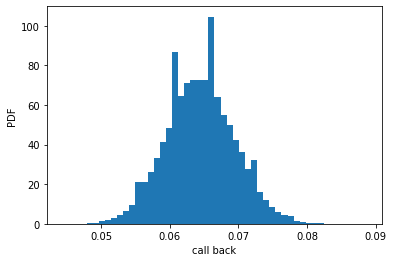

White call back
0.09649433264225721
0.005980452750310963
[0.08501027 0.10841889]


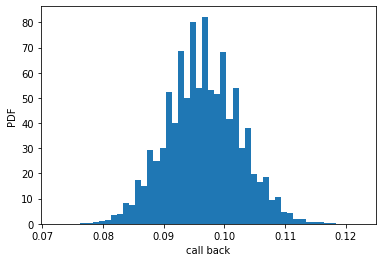

In [10]:
# Bootstrap Mean, Standard Error of Mean and 95% confidence level Calculation for w and b data sets. 

bs_rep_b = np.empty(100000)
bs_rep_w = np.empty(100000)

for i in range(100000):
        bs_rep_b[i] = np.mean(np.random.choice(b['call'], size=2435))
        bs_rep_w[i] = np.mean(np.random.choice(w['call'], size=2435))
        

print("Black call back")        
        
b_bs_mean=bs_rep_b.mean()        
print(b_bs_mean)

b_bs_std = np.std(bs_rep_b)
print(b_bs_std)

b_bs_con=np.percentile(bs_rep_b,[2.5,97.5])
print(b_bs_con)

_ = plt.hist(bs_rep_b, bins=50, density=True)
_ = plt.xlabel('call back')
_ = plt.ylabel('PDF')

plt.show()


print("White call back")  

w_bs_mean=bs_rep_w.mean()        
print(w_bs_mean)

w_bs_std = np.std(bs_rep_w)
print(w_bs_std)

w_bs_con=np.percentile(bs_rep_w,[2.5,97.5])
print(w_bs_con)

_ = plt.hist(bs_rep_w, bins=50, density=True)
_ = plt.xlabel('call back')
_ = plt.ylabel('PDF')

plt.show()

0.08049932656347751
0.0038827097097792924
[0.07289527 0.08829569]


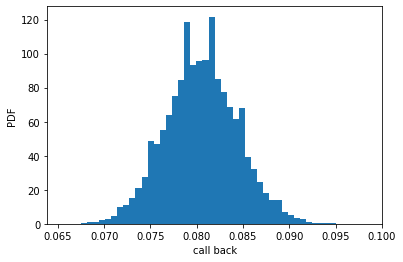

In [11]:
# Bootstrap Mean, Standard Error of Mean and 95% confidence level Calculation for whole data set.

bs_rep = np.empty(100000)


for i in range(100000):
        w_draw=np.random.choice(w['call'], size=2435)
        b_draw=np.random.choice(b['call'], size=2435)
        total=np.concatenate((w_draw,b_draw),axis=None)
        bs_rep[i] = np.mean(total)
        
        
bs_mean=bs_rep.mean()        
print(bs_mean)

bs_std = np.std(bs_rep)
print(bs_std)

bs_con=np.percentile(bs_rep,[2.5,97.5])
print(bs_con)

_ = plt.hist(bs_rep, bins=50, density=True)
_ = plt.xlabel('call back')
_ = plt.ylabel('PDF')

plt.show()

In [12]:
# Two Sample Bootstrap test for difference of means.

# H0: difference of means equals 0.
# HA: difference of means does not equal 0.

# p-value = 0.0. Therefore, we reject the null hypothesis in favour of the alternative hypothesis.

B=b['call']
W=w['call']

bshifted= B- np.mean(B) + data['call'].mean()
wshifted= W - np.mean(W) + data['call'].mean()

n=100000

bs_rep_B = np.empty(n) 
bs_rep_W = np.empty(n) 

for i in range(n):
        bs_rep_B[i] = np.mean(np.random.choice(bshifted, size=2435))
        bs_rep_W[i] = np.mean(np.random.choice(wshifted, size=2435))

bs_rep = bs_rep_W - bs_rep_B
                              
p = np.sum(bs_rep >= (W.mean()-B.mean())) / n
print('p-value =', p)

p-value = 0.0


In [24]:
# Frequentist Mean, Standard Error of Mean and 95% confidence level Calculation for w and b data sets.

# For Bernoulli distribution, the mean is calculated as E[X]=p where p is probability of call back.
# For Bernoulli distribution, the standard error of mean SEM = (k*p*(1-p)/n)^0.5 where k = number of trial and n = sample size.
# for Bernoulli distribution, the 95% confidence interval is calculated as p + 2 * SEM and p - 2 * SEM.

# The results below match those obtained from the bootstrap calculations.

print("Black call back")

bmean=157/2435
print(bmean)

bsem=((bmean*(1-bmean))/2435)**(0.5)
print(bsem)

bconl = bmean - 2*bsem
bconu = bmean + 2*bsem
print(bconl)
print(bconu)

print("\nWhite call back")

wmean=235/2435
print(wmean)

wsem=((wmean*(1-wmean))/2435)**(0.5)
print(wsem)

wconl = wmean - 2*wsem
wconu = wmean + 2*wsem
print(wconl)
print(wconu)

Black call back
0.06447638603696099
0.004977121442811946
0.05452214315133709
0.07443062892258488

White call back
0.09650924024640657
0.005984072178128066
0.08454109589015044
0.10847738460266271


In [29]:
# Frequentist Mean, Standard Error of Mean and 95% confidence level Calculation for whole data set.

# For Bernoulli distribution, the mean is calculated as E[X]=p where p is probability of call back.
# For Bernoulli distribution, the standard error of mean SEM = (k*p*(1-p)/n)^0.5 where k = number of trial and n = sample size.
# for Bernoulli distribution, the 95% confidence interval is calculated as p + 2 * SEM and p - 2 * SEM.

# The results below match those obtained from the bootstrap calculations.

print("Overall call back")

mean=(157+235)/(2435*2)
print(mean)

sem=((mean*(1-mean))/(2435*2))**(0.5)
print(sem)

conl = mean - 2*sem
conu = mean + 2*sem
print(conl)
print(conu)

Overall call back
0.08049281314168377
0.0038984470180852284
0.07269591910551332
0.08828970717785423


In [33]:
# Frequentist p-value calculation.

# one-way chi square test is used because data is categorical.

# H0: there is no association between the race and call back.
# HA: there is an association between the race and call back.

# pvalue=2.6464e-06. We reject the null hypothesis in favour of the alternative hypothesis.

# This result is in alignment with the results of the "Two Sample Bootstrap test for difference of means".

import scipy

scipy.stats.chisquare([2200,235,2278,157],[2200,235,2200,235])


Power_divergenceResult(statistic=28.654816247582204, pvalue=2.646407945261075e-06)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

In [ ]:
# 4. Write a story describing the statistical significance in the context or the original problem.

In [ ]:
# 2435 resumes with "white sounding" names were sent to employers and 235 calls for interiews were obtained.
# 2435 resumes with "white sounding" names were sent to employers and 157 calls for interiews were obtained.
# White call back percentage was 9.65% and black call back percentage was 6.44%.
# "Two Sample Bootstrap test for difference of means" confirmed that the difference between the means was statistically 
# significant.
# "one-way chi square test" confirmed that there is an association between "race" and "call back"

In [ ]:
# 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? 
# If not, how would you amend your analysis?

In [ ]:
# No. race/name is the only factor that was analysed. If more variables such as relevance of past work experience, 
# years of experience, education level, field of study were analyzed, it could possibly be found that one of these other factors
# was a greater determinante in getting called for an interview.

# The analysis should be appended to test other variables to determine which variable is the most important factor in getting
# called for an interview.